Name: Daniel Masters || USC id: 6203966352 || Github username: damasters 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

<h1> DSCI 552 Homework #2 </h1>
<h2> 1) Combined Cycle Power Plant Data Set </h2>
<p> The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant. </p>

(a) Download the Combined Cycle Power Plant data from:
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

(b) Exploring the data:

i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [2]:
data = pd.read_excel('../data/Folds5x2_pp.xlsx')
num_rows = data.shape[0]
num_columns = data.shape[1]
print("The number of rows is: "+str(num_rows))
print("The number of columns is: "+str(num_columns))
print('There are 9568 rows in this dataset and there are 5 columns in this dataset. The rows represent completed data measurements across all independent and dependent variables each hour. The columns represent each of the ambient variables which are Temperature (T),  Ambient Pressure (AP), Relative Humidity (RH) Exhaust Vacuum (V) and net electrical energy output (PE).')
data

The number of rows is: 9568
The number of columns is: 5
There are 9568 rows in this dataset and there are 5 columns in this dataset. The rows represent completed data measurements across all independent and dependent variables each hour. The columns represent each of the ambient variables which are Temperature (T),  Ambient Pressure (AP), Relative Humidity (RH) Exhaust Vacuum (V) and net electrical energy output (PE).


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe
your findings.

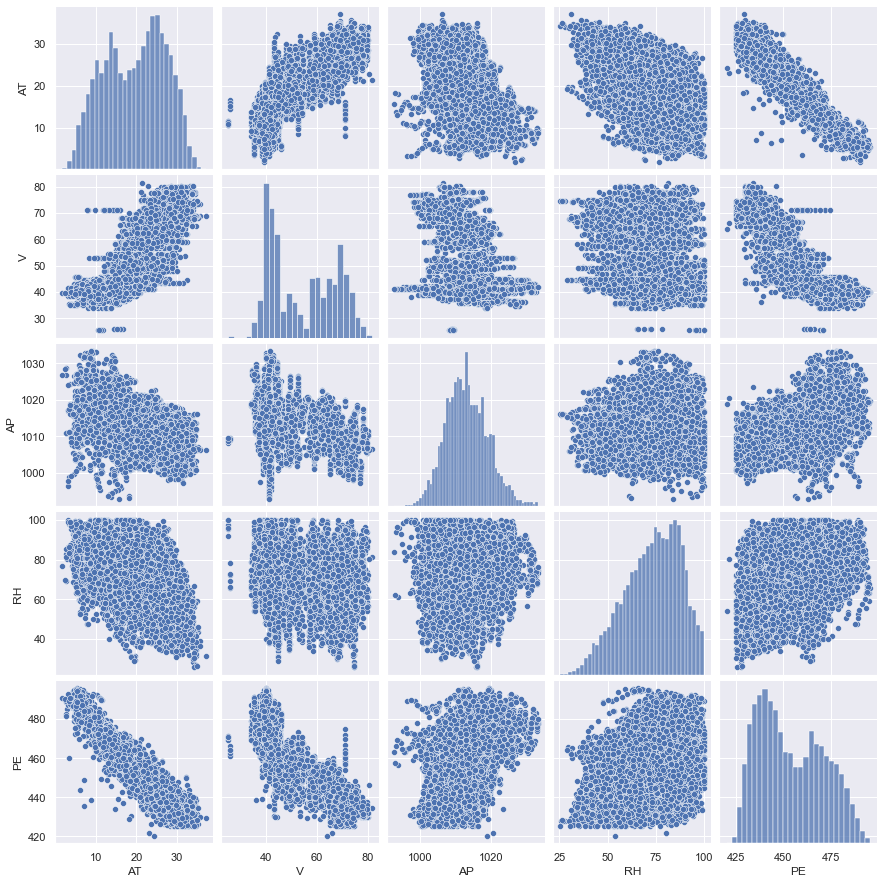

The correlation between the AT and PE is strong negative linear. The correlation between V and PE is strong negative linear. The correlation between AP and PE is moderate positive linear. The correlation between RH and PE is weak positive linear.


In [3]:
variables = ['AT', 'V', 'AP', 'RH', 'PE']
sns.set()
sns.pairplot(data, vars= variables)
plt.show()
print('The correlation between the AT and PE is strong negative linear. The correlation between V and PE is strong negative linear. The correlation between AP and PE is moderate positive linear. The correlation between RH and PE is weak positive linear.')

iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them
in a table.

In [4]:
mean = data.mean()
median = data.median()
data_range = data.max() - data.min()
first_quartile = data.quantile(.25)
third_quartile = data.quantile(.75)
iqr = third_quartile - first_quartile
table = pd.DataFrame({'Mean': mean, 'Median': median, 'Range': data_range, 'First Quartile': first_quartile, 'Third Quartile': third_quartile, 'Interquartile Range': iqr})
table

,Mean,Median,Range,First Quartile,Third Quartile,Interquartile Range
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:06:27   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

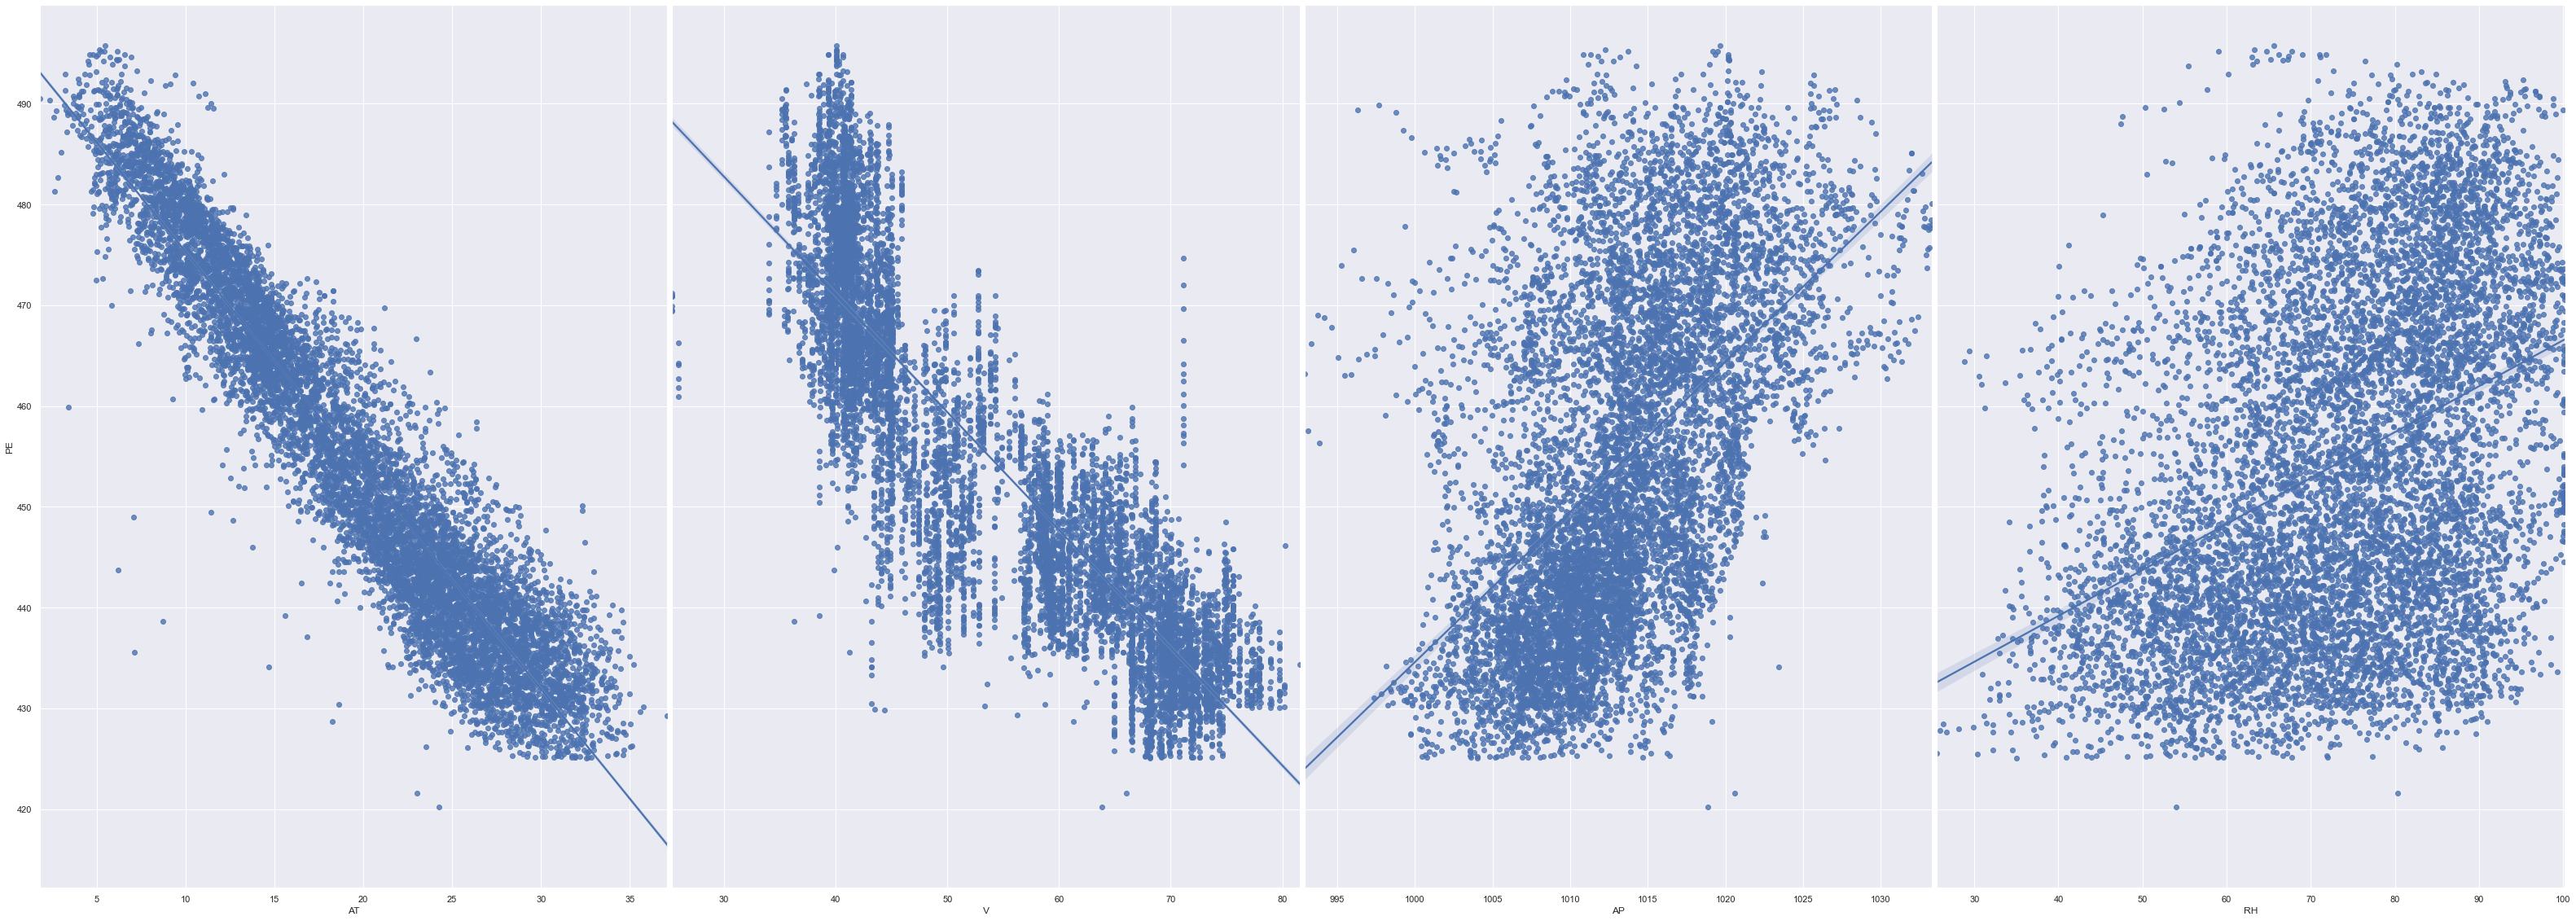

There are 0 outliers in AT.
There are 0 outliers in V.
There are 88 outliers in AP.
There are 0 outliers in RH.

From these calculations, it seems that there are many outliers in AP that I would like to remove.


In [5]:
uni_coef_list = []
for abbrev in ['AT', 'V', 'AP', 'RH']:    
    y = data['PE']
    x = data[abbrev]
    x = sm.add_constant(x)
    new_model = sm.OLS(y, x).fit()
    uni_coef_list.append(new_model.params)
    print(new_model.summary())
print('\nAll models are hold a statistically significant association between the predictor and the response because all of the p-values are less than .05')
sns.pairplot(data, x_vars=['AT', 'V', 'AP', 'RH'], y_vars=['PE'], height = 16, aspect=.70, kind='reg', diag_kind=None)
plt.show()
#Finding Outliers
lower_limit = first_quartile - (1.5*iqr)
upper_limit = third_quartile + (1.5*iqr)
at_count = 0
v_count = 0
ap_count = 0
rh_count = 0
for i in data[['AT']].values:
    if i < lower_limit[0] or i > upper_limit[0]:
        at_count += 1
for i in data[['V']].values:
    if i < lower_limit[1] or i > upper_limit[1]:
        v_count += 1
for i in data[['AP']].values:
    if i < lower_limit[2] or i > upper_limit[2]:
        ap_count += 1   
for i in data[['RH']].values:
    if i < lower_limit[3] or i > upper_limit[3]:
        rh_count += 1
print('There are '+str(at_count)+ " outliers in AT.")
print('There are '+str(v_count)+ " outliers in V.")
print('There are '+str(ap_count)+ " outliers in AP.")
print('There are '+str(at_count)+ " outliers in RH.")
print('\nFrom these calculations, it seems that there are many outliers in AP that I would like to remove.')

(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0: βj = 0?

In [6]:
x_train = data[['AT', 'V', 'AP', 'RH']]
y_train = data['PE']
x_train = sm.add_constant(x_train)
new_model_2 = sm.OLS(y_train, x_train).fit()
multi_coef = new_model_2.params
print(new_model_2.summary())
print('\nAll variables are statistically significant because their respective p-values are less than 0.05.')
print('We can reject the null hypothesis for all predictors.')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:06:29   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis. 

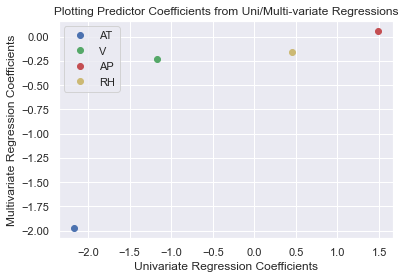

In [7]:
plt.title('Plotting Predictor Coefficients from Uni/Multi-variate Regressions')
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multivariate Regression Coefficients')

plt.plot(uni_coef_list[0][1], multi_coef[1], 'bo', label='AT')
plt.plot(uni_coef_list[1][1], multi_coef[2], 'go', label='V')
plt.plot(uni_coef_list[2][1], multi_coef[3], 'ro', label='AP')
plt.plot(uni_coef_list[3][1], multi_coef[4], 'yo', label='RH')
plt.legend()
plt.show()

(f) Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form
Y=β0+β1X+β2X2+β3X3+e

In [8]:
for i in ['AT', 'V', 'AP', 'RH']:
    lr = LinearRegression()
    x_vals = data[i].values
    y_vals = data['PE'].values
    fitted_x = np.arange(data[i].min(), data[i].max(), 1).reshape(-1,1)
    polynom = PolynomialFeatures(3)
    new_x_vals = polynom.fit_transform(x_vals.reshape(-1,1))
    lr.fit(new_x_vals, y_vals)
    outcome = lr.predict(polynom.fit_transform(fitted_x))
    #preparing the OLS Regression Results
    xs = np.column_stack((x_vals, x_vals**2, x_vals**3))
    x_const = sm.add_constant(xs)
    new_model = sm.OLS(y_vals, x_const).fit()
    uni_coef_list.append(new_model.params)
    print(new_model.summary())  

print('\nThere is evidence of nonlinear association between all of the predictors and the response except for quadratic of V where the p-value of x^2 is .768 > .05.')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:06:30   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

(g) Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.

In [9]:
df_1 = pd.DataFrame({"AT&V": range(9568)})
df_1['AT&V'] = data['AT'] * data['V']
df_2 = pd.DataFrame({"AT&AP": range(9568)})
df_2['AT&AP'] = data['AT'] * data['AP']
df_3 = pd.DataFrame({"AT&RH": range(9568)})
df_3['AT&RH'] = data['AT'] * data['RH']
df_4 = pd.DataFrame({"V&AP": range(9568)})
df_4['V&AP'] = data['V'] * data['AP']
df_5 = pd.DataFrame({"V&RH": range(9568)})
df_5['V&RH'] = data['V'] * data['RH']
df_6 = pd.DataFrame({"AP&RH": range(9568)})
df_6['AP&RH'] = data['AP'] * data['RH']


    
all_models = [data[['AT', 'V', 'AP', 'RH']], df_1, df_2, df_3, df_4, df_5, df_6]
combined = pd.concat(all_models, axis=1)
y_values = data['PE'].values
new_const = sm.add_constant(combined)
regr_results = sm.OLS(y_values, new_const).fit()
print(regr_results.summary()) 
print('\nThere is evidence of association of predictors with the response. AT & V, AT & RH, V & AP, AP & RH are statistically significant at 95% confidence level.')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:06:30   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [10]:
#training the regression model on a randomly select 70% subset of the data
rand_70 = data.sample(frac=.70)
train_x = rand_70[['AT', 'V', 'AP', 'RH']]
train_y = rand_70['PE']
indexes = rand_70.index
remaining = data[~data.index.isin(indexes)]
test_x = remaining.iloc[:, 0:4]
test_y = remaining.iloc[:, 4:]
training_x = sm.add_constant(train_x)
trained_model = sm.OLS(train_y, training_x).fit()
print(trained_model.summary())
#running regression model on all possible interaction terms and quad nonlinearitie

new_df_1 = pd.DataFrame({"AT^2": range(9568)})
new_df_1['AT^2'] = data['AT']**2
new_df_2 = pd.DataFrame({"V^2": range(9568)})
new_df_2['V^2'] = data['V']**2
new_df_3 = pd.DataFrame({"AP^2": range(9568)})
new_df_3['AP^2'] = data['AP']**2
new_df_4 = pd.DataFrame({"RH^2": range(9568)})
new_df_4['RH^2'] = data['RH']**2

#Model with the predictors + quadratic polynomials + Interactions between predictors.
df_all = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, data['AT'], new_df_1, data['V'], new_df_2, data['AP'], new_df_3, data['RH'], new_df_4, data['PE']], axis = 1)
all_rand_70 = df_all.sample(frac=.70)
indexes_70 = all_rand_70.index
remain_30 = df_all[~df_all.index.isin(indexes_70)]
training_x_all = sm.add_constant(all_rand_70.iloc[:, 0:14])
training_y_all = all_rand_70.iloc[:, 14]
remain_x_all = sm.add_constant(remain_30.iloc[:, 0:14])
remain_y_all = remain_30.iloc[:, 14]
trained_model_all = sm.OLS(training_y_all, training_x_all).fit()
trained_model_remain = sm.OLS(remain_y_all, remain_x_all).fit()
print(trained_model_all.summary())

#Model with the predictors + quadratic polynomials + Interactions between predictors after removing the insignificant terms. 
new_df_all = df_all.drop(columns=['AT&AP', 'V&AP', 'V&RH', 'V^2'])
all_rand_70_2 = new_df_all.sample(frac=.70)
indexes_70_2 = all_rand_70_2.index
remain_30_2 = new_df_all[~new_df_all.index.isin(indexes_70_2)]
training_x_all_2 = sm.add_constant(all_rand_70_2.iloc[:, :-1])
training_y_all_2 = all_rand_70_2.iloc[:, -1:]
remain_x_all_2 = sm.add_constant(remain_30_2.iloc[:, :-1])
remain_y_all_2 = remain_30_2.iloc[:, -1:]
trained_model_all_2 = sm.OLS(training_y_all_2, training_x_all_2).fit()
trained_model_remain_2 = sm.OLS(remain_y_all_2, remain_x_all_2).fit()
print(trained_model_all_2.summary())

#getting test mses for both models
test_pred_x = trained_model_remain.predict(remain_x_all)
test_mse = metrics.mean_squared_error(remain_y_all, test_pred_x)
print("\nTest MSE of model without removed insignificant variables: "+str(test_mse))

test_pred_x_2 = trained_model_remain_2.predict(remain_x_all_2)
test_mse_2 = metrics.mean_squared_error(remain_y_all_2, test_pred_x_2)
print("Test MSE of model with removed insignificant variables: "+str(test_mse_2))

#getting training mses for both models
training_pred_x = trained_model_all.predict(training_x_all)
train_mse = metrics.mean_squared_error(training_y_all, training_pred_x)
print("Training MSE of model without removed insignificant variables: "+str(train_mse))

training_pred_x_2 = trained_model_all_2.predict(training_x_all_2)
train_mse_2 = metrics.mean_squared_error(training_y_all_2, training_pred_x_2)
print("Training MSE of model with removed insignificant variables: "+str(train_mse_2))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.208e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:06:30   Log-Likelihood:                -19659.
No. Observations:                6698   AIC:                         3.933e+04
Df Residuals:                    6693   BIC:                         3.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        451.3475     11.651     38.740      0.0

(i)KNN Regression:


i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k∈ {1,2, . . . ,100} that gives you thebest fit. Plot the train and test errors in terms of 1/k.

The raw features optimal k is: 5 with an MSE of: 16.16216277909408
The normalized features optimal k is: 4 with an MSE of: 14.356734536149824


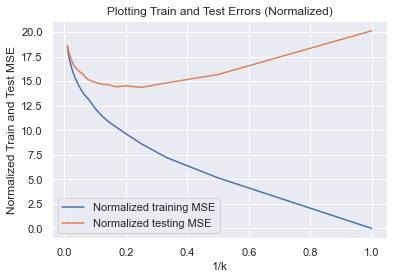

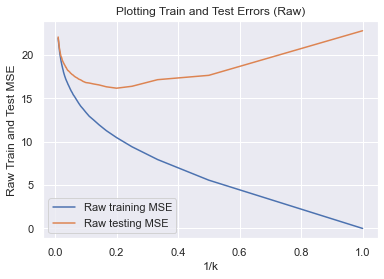

In [11]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_x)
scaled_test = scaler.transform(test_x)
raw_dict = {}
scaled_dict = {}
raw_dict_2 = {}
scaled_dict_2 = {}

for k in range(1,101):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(scaled_train, train_y)
    pred_scaled =  knn.predict(scaled_train)
    pred_scaled_2 = knn.predict(scaled_test)
    scaled_acc = metrics.mean_squared_error(train_y, pred_scaled) #
    scaled_acc_2 = metrics.mean_squared_error(test_y, pred_scaled_2)
    scaled_dict[k] = scaled_acc
    scaled_dict_2[k] = scaled_acc_2
    
for k in range(1,101):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_x, train_y)
    raw_model = knn.predict(train_x)
    raw_model_2 = knn.predict(test_x)
    raw_acc = metrics.mean_squared_error(train_y, raw_model)
    raw_acc_2 = metrics.mean_squared_error(test_y, raw_model_2)
    raw_dict[k] = raw_acc
    raw_dict_2[k] = raw_acc_2
    
min_raw_train = min(raw_dict, key=raw_dict.get)
error_min_raw_train = min(raw_dict.values())
min_raw_test = min(raw_dict_2, key=raw_dict_2.get)
error_min_raw_test = min(raw_dict_2.values())
min_scaled_train = min(scaled_dict, key=scaled_dict.get)
error_min_scaled_train = min(scaled_dict.values())
min_scaled_test = min(scaled_dict_2, key=scaled_dict_2.get)
error_min_scaled_test = min(scaled_dict_2.values())

print("The raw features optimal k is: "+str(min_raw_test)+" with an MSE of: "+str(error_min_raw_test))
print("The normalized features optimal k is: "+str(min_scaled_test)+" with an MSE of: "+str(error_min_scaled_test))

  
plt.plot(1/np.arange(1,101), scaled_dict.values(), label='Normalized training MSE')
plt.plot(1/np.arange(1,101), scaled_dict_2.values(), label='Normalized testing MSE')
plt.title('Plotting Train and Test Errors (Normalized)')
plt.xlabel('1/k')
plt.ylabel('Normalized Train and Test MSE')
plt.legend()
plt.show()

plt.plot(1/np.arange(1,101), raw_dict.values(), label='Raw training MSE')
plt.plot(1/np.arange(1,101), raw_dict_2.values(), label='Raw testing MSE')
plt.title('Plotting Train and Test Errors (Raw)')
plt.xlabel('1/k')
plt.ylabel('Raw Train and Test MSE')
plt.legend()
plt.show()

(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [12]:
print('The smallest MSE of the linear regression model is: '+str(train_mse))
print('The smallest MSE of the KNN regression model is: '+str(error_min_scaled_test))
print('The KNN Regression model is better. This supports the fact that KNN regression performs better (has lower mse) than linear regression in a 2D dataset.')

The smallest MSE of the linear regression model is: 18.04622267982413
The smallest MSE of the KNN regression model is: 14.356734536149824
The KNN Regression model is better. This supports the fact that KNN regression performs better (has lower mse) than linear regression in a 2D dataset.


2) ISLR: 2.4.1
1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

a) The sample size n is extremely large, and the number of predictors p is small.

We would expect the performance of a flexible statistical learning method to be better than an inflexible method because a flexible statistical learning method will fit the data better and since there is a large n, the risk of overfitting is reduced.

b) The number of predictors p is extremely large, and the number
of observations n is small.

We would expect the performance of a flexible statistical learning method to be worse than an inflexible method. An inflexible method will experience less overfitting than a flexible method because it’s fit will not be as close to the data points as is the case with a flexible method. 

c) The relationship between the predictors and response is highly
non-linear.

We would expect the performance of a flexible statistical learning method to be better than an inflexible method because the flexible method will be able to fit better in a nonlinear relationship. 

d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.

We would expect the performance of a flexible statistical learning method to be worse than an inflexible method because the flexible method will fit to the noise generated by the high variance of the error terms.


3) ISLR: 2.4.7
The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Obs. X1 X2 X3 Y
1    0  3  0 Red
2    2  0  0 Red
3    0  1  3 Red
4    0  1  2 Green
5   −1  0  1 Green
6    1  1  1 Red

Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.

a) Compute the Euclidean distance between each observation and
the test point, X1 = X2 = X3 = 0.

sqrt(0 + 9 + 0) = 3

sqrt(4 + 0 + 0) = 2

sqrt(0 + 1 + 9) = sqrt(10) = 3.16

sqrt(0 + 1 + 4) = sqrt(5) = 2.24

sqrt(1 + 0 + 1) = sqrt(2) = 1.41

sqrt(1 + 1 + 1) = sqrt(3) = 1.73

b) What is our prediction with K = 1? Why?

Green because the nearest neighbor is the fifth observation which is green.

c) What is our prediction with K = 3? Why?

Red because red receives the majority vote (2 out of 3 times) out of the 3 nearest neighbors.

d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

We would expect that the best value for k would be small because the smaller k is, the more flexible (non-linear) the Bayes decision boundary becomes.
